In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
import tensorflow as tf
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import HTML
import seaborn as sns
sns.set()

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(df.iloc[:, 1:-1]))
Y = LabelEncoder().fit_transform(df.iloc[:, -1])
onehot_y = np.zeros((X.shape[0], np.unique(Y).shape[0]))
for k in range(X.shape[0]):
    onehot_y[k, Y[k]] = 1.0

In [4]:
class Normal_model:
    def __init__(self, learning_rate, layer_size):
        self.X = tf.placeholder(tf.float32, (None, X.shape[1]))
        self.Y = tf.placeholder(tf.float32, (None, np.unique(Y).shape[0]))
        w1 = tf.Variable(tf.random_normal([X.shape[1], layer_size]))
        b1 = tf.Variable(tf.random_normal([layer_size]))
        w2 = tf.Variable(tf.random_normal([layer_size, layer_size]))
        b2 = tf.Variable(tf.random_normal([layer_size]))
        w3 = tf.Variable(tf.random_normal([layer_size, np.unique(Y).shape[0]]))
        b3 = tf.Variable(tf.random_normal([np.unique(Y).shape[0]]))
        self.logits = tf.nn.sigmoid(tf.matmul(self.X, w1) + b1)
        self.logits = tf.nn.sigmoid(tf.matmul(self.logits, w2) + b2)
        self.logits = tf.matmul(self.logits, w3) + b3
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.Y, logits=self.logits))
        self.optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(self.cost)
        correct_pred = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
        
class L1_model:
    def __init__(self, learning_rate, layer_size, alpha):
        self.X = tf.placeholder(tf.float32, (None, X.shape[1]))
        self.Y = tf.placeholder(tf.float32, (None, np.unique(Y).shape[0]))
        w1 = tf.Variable(tf.random_normal([X.shape[1], layer_size]))
        b1 = tf.Variable(tf.random_normal([layer_size]))
        w2 = tf.Variable(tf.random_normal([layer_size, layer_size]))
        b2 = tf.Variable(tf.random_normal([layer_size]))
        w3 = tf.Variable(tf.random_normal([layer_size, np.unique(Y).shape[0]]))
        b3 = tf.Variable(tf.random_normal([np.unique(Y).shape[0]]))
        self.logits = tf.nn.sigmoid(tf.matmul(self.X, w1) + b1)
        self.logits = tf.nn.sigmoid(tf.matmul(self.logits, w2) + b2)
        self.logits = tf.matmul(self.logits, w3) + b3
        l1_regularizer = tf.contrib.layers.l1_regularizer(scale=alpha, scope=None)
        weights = tf.trainable_variables()
        regularization_penalty = tf.contrib.layers.apply_regularization(l1_regularizer, weights)
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.Y, logits=self.logits)) + regularization_penalty
        self.optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(self.cost)
        correct_pred = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
        
class L2_model:
    def __init__(self, learning_rate, layer_size, alpha):
        self.X = tf.placeholder(tf.float32, (None, X.shape[1]))
        self.Y = tf.placeholder(tf.float32, (None, np.unique(Y).shape[0]))
        w1 = tf.Variable(tf.random_normal([X.shape[1], layer_size]))
        b1 = tf.Variable(tf.random_normal([layer_size]))
        w2 = tf.Variable(tf.random_normal([layer_size, layer_size]))
        b2 = tf.Variable(tf.random_normal([layer_size]))
        w3 = tf.Variable(tf.random_normal([layer_size, np.unique(Y).shape[0]]))
        b3 = tf.Variable(tf.random_normal([np.unique(Y).shape[0]]))
        self.logits = tf.nn.sigmoid(tf.matmul(self.X, w1) + b1)
        self.logits = tf.nn.sigmoid(tf.matmul(self.logits, w2) + b2)
        self.logits = tf.matmul(self.logits, w3) + b3
        l2_regularizer = tf.contrib.layers.l2_regularizer(scale=alpha, scope=None)
        weights = tf.trainable_variables()
        regularization_penalty = tf.contrib.layers.apply_regularization(l2_regularizer, weights)
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.Y, logits=self.logits)) + regularization_penalty
        self.optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(self.cost)
        correct_pred = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
        
class L1L2_model:
    def __init__(self, learning_rate, layer_size, alpha):
        self.X = tf.placeholder(tf.float32, (None, X.shape[1]))
        self.Y = tf.placeholder(tf.float32, (None, np.unique(Y).shape[0]))
        w1 = tf.Variable(tf.random_normal([X.shape[1], layer_size]))
        b1 = tf.Variable(tf.random_normal([layer_size]))
        w2 = tf.Variable(tf.random_normal([layer_size, layer_size]))
        b2 = tf.Variable(tf.random_normal([layer_size]))
        w3 = tf.Variable(tf.random_normal([layer_size, np.unique(Y).shape[0]]))
        b3 = tf.Variable(tf.random_normal([np.unique(Y).shape[0]]))
        self.logits = tf.nn.sigmoid(tf.matmul(self.X, w1) + b1)
        self.logits = tf.nn.sigmoid(tf.matmul(self.logits, w2) + b2)
        self.logits = tf.matmul(self.logits, w3) + b3
        l1_regularizer = tf.contrib.layers.l1_regularizer(scale=alpha, scope=None)
        l2_regularizer = tf.contrib.layers.l2_regularizer(scale=alpha, scope=None)
        weights = tf.trainable_variables()
        regularization_penalty = 0.5* tf.contrib.layers.apply_regularization(l1_regularizer, weights) + 0.5 * tf.contrib.layers.apply_regularization(l2_regularizer, weights)
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.Y, logits=self.logits)) + regularization_penalty
        self.optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(self.cost)
        correct_pred = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [6]:
tf.reset_default_graph()
first_graph = tf.Graph()
with first_graph.as_default():
    gd = Normal_model(0.1, 128)
    first_sess = tf.InteractiveSession()
    first_sess.run(tf.global_variables_initializer())
    
second_graph = tf.Graph()
with second_graph.as_default():
    l1 = L1_model(0.1, 128, 0.0005)
    second_sess = tf.InteractiveSession()
    second_sess.run(tf.global_variables_initializer())
    
third_graph = tf.Graph()
with third_graph.as_default():
    l2 = L2_model(0.1, 128, 0.0005)
    third_sess = tf.InteractiveSession()
    third_sess.run(tf.global_variables_initializer())
    
fourth_graph = tf.Graph()
with fourth_graph.as_default():
    l1l2 = L1L2_model(0.1, 128, 0.0005)
    fourth_sess = tf.InteractiveSession()
    fourth_sess.run(tf.global_variables_initializer())

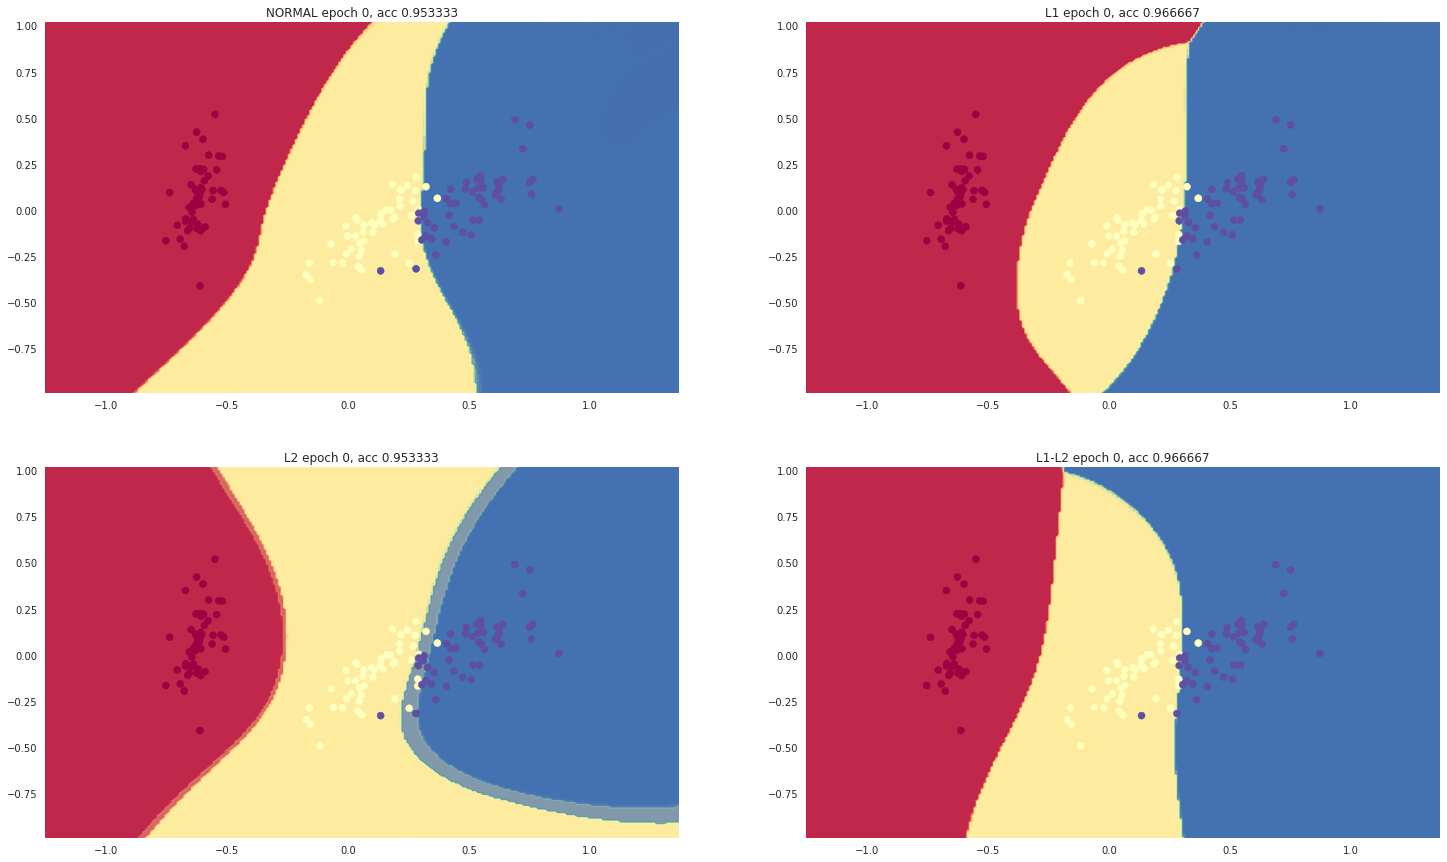

In [7]:
fig = plt.figure(figsize=(25,15))
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
concated = np.c_[xx.ravel(), yy.ravel()]
plt.subplot(2, 2, 1)
Z = first_sess.run(gd.logits, feed_dict={gd.X:concated})
acc = first_sess.run(gd.accuracy, feed_dict={gd.X:X, gd.Y:onehot_y})
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha =0.5)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title('NORMAL epoch %d, acc %f'%(0, acc))
plt.subplot(2, 2, 2)
Z = second_sess.run(l1.logits, feed_dict={l1.X:concated})
acc = second_sess.run(l1.accuracy, feed_dict={l1.X:X, l1.Y:onehot_y})
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha =0.5)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title('L1 epoch %d, acc %f'%(0, acc))
plt.subplot(2, 2, 3)
Z = third_sess.run(l2.logits, feed_dict={l2.X:concated})
acc = third_sess.run(l2.accuracy, feed_dict={l2.X:X, l2.Y:onehot_y})
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha =0.5)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title('L2 epoch %d, acc %f'%(0, acc))
plt.subplot(2, 2, 4)
Z = fourth_sess.run(l1l2.logits, feed_dict={l1l2.X:concated})
acc = fourth_sess.run(l1l2.accuracy, feed_dict={l1l2.X:X, l1l2.Y:onehot_y})
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha =0.5)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title('L1-L2 epoch %d, acc %f'%(0, acc))

def training(epoch):
    plt.subplot(2, 2, 1)
    first_sess.run(gd.optimizer, feed_dict={gd.X:X, gd.Y:onehot_y})
    Z = first_sess.run(gd.logits, feed_dict={gd.X:concated})
    acc = first_sess.run(gd.accuracy, feed_dict={gd.X:X, gd.Y:onehot_y})
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha =0.5)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
    plt.title('NORMAL epoch %d, acc %f'%(epoch, acc))
    plt.subplot(2, 2, 2)
    second_sess.run(l1.optimizer, feed_dict={l1.X:X, l1.Y:onehot_y})
    Z = second_sess.run(l1.logits, feed_dict={l1.X:concated})
    acc = second_sess.run(l1.accuracy, feed_dict={l1.X:X, l1.Y:onehot_y})
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha =0.5)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
    plt.title('L1 epoch %d, acc %f'%(epoch, acc))
    plt.subplot(2, 2, 3)
    third_sess.run(l2.optimizer, feed_dict={l2.X:X, l2.Y:onehot_y})
    Z = third_sess.run(l2.logits, feed_dict={l2.X:concated})
    acc = third_sess.run(l2.accuracy, feed_dict={l2.X:X, l2.Y:onehot_y})
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha =0.5)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
    plt.title('L2 epoch %d, acc %f'%(epoch, acc))
    plt.subplot(2, 2, 4)
    fourth_sess.run(l1l2.optimizer, feed_dict={l1l2.X:X, l1l2.Y:onehot_y})
    Z = fourth_sess.run(l1l2.logits, feed_dict={l1l2.X:concated})
    acc = fourth_sess.run(l1l2.accuracy, feed_dict={l1l2.X:X, l1l2.Y:onehot_y})
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha =0.5)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
    cont = plt.title('L1-L2 epoch %d, acc %f'%(epoch, acc))
    return cont
    
anim = animation.FuncAnimation(fig, training, frames=100, interval=200)
anim.save('animation-regularizationcomparison-iris.gif', writer='imagemagick', fps=5)